# MLE Notebook 2: Multivariate random variables, Likelihood functions
### 0. Contents
Multivariate random variables, joint probability density functions, bivariate normal, marginal and conditional distributions, Bayes' theorem, total law of expectation and variance, covariance and correlation, independence. 

Likelihood and log-likelihood function. Point estimation, maximisation by hand, maximisation by computer. MLE coin-tossing example, i.i.d. normal example. 

### 1. Multivariate random variables
Quite often multiple r.v. are considered simultaneously in a system due to their interaction. For example, population sizes of the species within a predator-prey system, allele frequencies at neighbouring loci, traits within an individual, and many more. It is essential to extend the discussions of r.v. and pmf/pdf to multivariate cases. 

#### 1.1 Joint probability density functions
Given a pair of r.v. $X$ and $Y$, the *joint* pmf/pdf is $f_{X,Y}(x,y)$, a higher-dimensional function. In this bivariate example the joint pdf can be visualised as a 3D plot. Following the same rules as the univeriate case, $f_{X,Y}(x,y)$ must be non-negative, and must integrate to one: 
$$\int\int f_{X,Y}(x,y)dxdy=1$$ 

##### 1.1.1 Bivariate normal random variables
The support of a bivariate normal r.v. is the entire real number *plane*, or $\Re^2$. The univariate normal has two parameters $\mu$ and $\sigma^2$ which are both numbers. Here we have the multivariate analog of the two quantities, but this time they are the mean vector $\boldsymbol{\mu}=\begin{pmatrix}\mu_X \\ \mu_Y \end{pmatrix}$ and variance-covariance matrix $\boldsymbol{\Sigma}=\begin{bmatrix}\sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix}$. 

The entries of $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$ are numbers. For instance, here we have the individual means and variances for $X$ and $Y$, and also $\rho$ for the correlation between the two. Check the link below to visualise the joint pdf of a bivariate normal r.v.. 

http://socr.ucla.edu/htmls/HTML5/BivariateNormal/

In general, for a $k$-dimensional multivariate normal, $\boldsymbol{\mu}$ is a vector of length $k$, and $\boldsymbol{\Sigma}$ is a $k$-by-$k$ symmetric and (semi)-postive definite matrix. Note that many applications rely on the decomposition of $\boldsymbol{\Sigma}$, such as Principal component analysis. 

#### 1.2 Marginal distributions
Sometimes we are interested in one r.v. without referencing to the values of another. This is equivalent to finding the marginal distribution of the r.v. of interest. In a bivariate case with r.v. $X$ and $Y$, the marginal pdf of $X$ is 
$$f_X(x)=\int f_{X,Y}(x,y)dy$$
The integration along the $y$ axis is to marginalise out (get rid of) the uninterested r.v. $Y$. As a result, there will be no $y$ left in $f_X(x)$. Similarly, we can integrate along $x$ axis to find $f_Y(y)$. Note that the marginal pdf is indeed a pdf therefore the properties we discussed yesterday still hold. 

#### 1.3 Conditional distributions
If the value of r.v. $Y$ is known (i.e. $Y=y$ is realised) then it *may* give additional information on $X$. The distribution of interest here is the conditional distribution of $X$ given $Y$: 
$$f_{X|Y}(x|y)=\frac{f_{X,Y}(x,y)}{f_Y(y)}$$

We can imagine $f_{X|Y}(x|y)$ as a slice of the joint pdf at $Y=y$ after normalisation. To find the conditional of $Y|X$ from the joint and the marginal of $X$ we have the following relationship: 
$$f_{X|Y}(x|y)f_Y(y)=f_{X,Y}(x,y)=f_{Y|X}(y|x)f_X(x)$$
I hope some of you may notice that this is the Bayes' theorem. I trust that you will be exposed to its applications next week hence I shall not go beyond this. The key here is learn how we can obtain one distribution from the others via "joint = marginal x conditional". 

### 2. Expectation and covariance
We can calculate expectations from the joint, conditional, or marginal distributions as before. With multiple r.v. come with more rules: 

#### 2.1 Law of total expectation
Given two r.v. $X$ and $Y$, 
$$E[Y]=E[E(Y|X)]$$
You first get the conditional expecation before taking another (outer) expectation to obtain the marginal expecation of $Y$. 

#### 2.2 Law of total variance
$$Var[Y]=E[Var(Y|X)]+Var[E(Y|X)]$$
which can be easily derived from the law of total expectation above. This is also called the "Eve's formula". 

#### 2.3 Covariance and corelation
Covariance measures the joint variability of a pair of r.v.. Given $X$ and $Y$, 
$$cov[X,Y]=E[XY]-E[X]E[Y]$$
where $E[XY]=\int \int xyf_{X,Y}(x,y)dxdy$. 

The correlation is the normalised measure describing the *linear* association between a pair of r.v.: 
$$corr[X,Y]=\frac{cov[X,Y]}{Var[X]Var[Y]}$$
which is always bounded between -1 and +1. Note that only linear association is captured by $corr[X,Y]$. A pair of r.v. can share zero correlation but are perfectly "related" (e.g. $X^2+Y^2=1$ as they go around a unit circle). 

Yesterday we mentioned that expectation is linear, that is, $E[aX+bY]=aE[X]+bE[Y]$ for some real numbers $a$ and $b$. This is true regardless of their correlation structure. The same cannot be said for variance:
$$Var[aX+bY]=a^2Var[X]+b^2Var[Y]+2abcov[X,Y]$$

### 3. Independence
Independence is the strongest assumption in statistics as there is no way to test for it in real world. How can one confirm the toss of the first coin has nothing to do with the second? How can one be so certain that my action here will have zero influence to that by another person thousands of kilometres away? Two events are independent if the occurrence of one does not affect the occurrence of another. 

If $X$ and $Y$ are independent then $corr[X,Y]=0$, but the reverse in not always true. In general $corr[X,Y]=0$ does not imply independence expect for some known cases (e.g. in multivariate normal). In fact, the assumption of independence is so strong that it guarantees $corr[g(X), h(Y)]=0$ for all real functions $g$ and $h$ you can possibly imagine. 

#### 3.1 Joint probability density functions under independence
$X$ and $Y$ are independent if and only if their joint pdf is the product of their marginals: 
$$f_{X,Y}(x,y)=f_X(x)f_Y(y)$$

### Interval
So far we have been discussing the properties of r.v., calculating probabilities and expectations etc. based on some given assumptions and fixed parameter value. A typical question would involve calculating the probability that 0, 1, 2 buses will arrive in the next unit of time. For example, if we assume the arrival of buses $X$ follow a Poisson distribution with $\lambda=3$, then
$$f_X(x, \lambda=3)=\frac{\lambda^xe^{-\lambda}}{x!}=\frac{3^xe^{-3}}{x!}$$
is a function of $x$ and a valid pmf. With known $/lambda$, we can calculate those probabilities by substituting $x=0$, $x=1$, and so on:

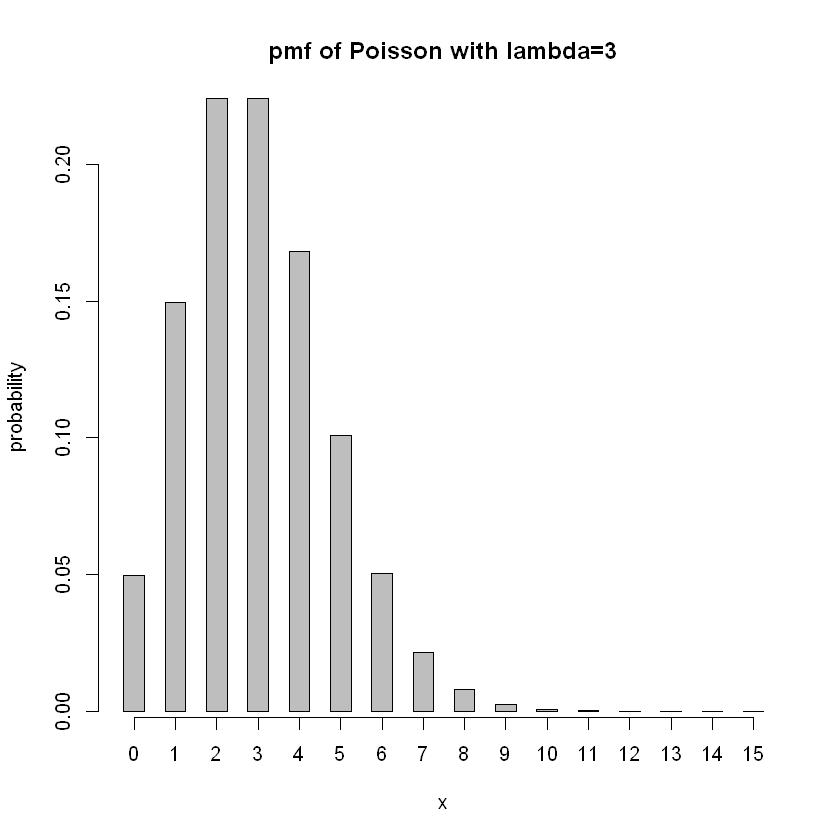

In [1]:
probability<-dpois(0:15, lambda=3)
barplot(probability, space=1, beside=F, xlab='x', ylab='probability', main='pmf of Poisson with lambda=3')
axis(1, at=seq(1, 31, 2)+0.5, labels=0:15)

From the pmf plot we know that $Pr(X=0)=0.0497$ and $Pr(X=1)=0.149$, and so on. Thur far there is no observation. We are still working out the probabilities of some potential outcomes inside our brain. We are still waiting for our bus. 

Now, the tide has turned that we actually have some data! Say we observed 3 buses within a unit time. This time we have $x=3$, but $\lambda$ is unknown. From the same Poisson "function", 
$$f_X(x=3, \lambda)=\frac{\lambda^xe^{-\lambda}}{x!}=\frac{\lambda^3e^{-\lambda}}{3!}$$
it becomes a function of $\lambda$ once the data is observed. One can plot this $f_X(x=3, \lambda)$ against $\lambda$, but it is no longer a pmf (note previously we have $f$ along $x$). By doing that, we are essentially asking "what is the proability of seeing 3 buses if $\lambda=1$?", and what if $\lambda=1.5$? And so on. 

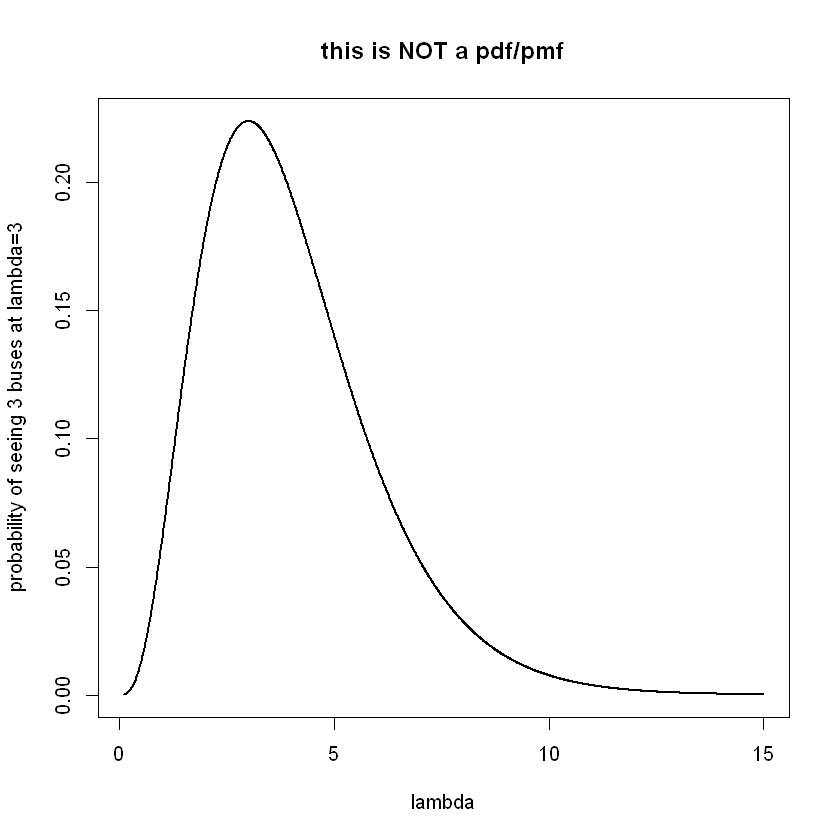

In [2]:
plot(seq(0.1, 15, 0.01), dpois(3, lambda=seq(0.1, 15, 0.01)), type='l', lwd=2, 
     xlab='lambda', ylab='probability of seeing 3 buses at lambda=3', main='this is NOT a pdf/pmf')

Now we are making *inference* on the unknown parameter given our observation. In the remaining sections of this notebook, we will formally introduce the likelihood framework for statistical inference. Welcome to the world of Statistics. 

### 4. Maximum Likelihood Estimation
Many said Maximum Likelihood Estimation (MLE) was invented by Sir Ronald Fisher, but I (as a statistician and geneticist many degrees inferior to Fisher) argue that such idea needs no invention but rather has been embedded in our mind since the beginning of civilisation. I sincerely hope that by the end of this week you will appreciate MLE as a collection of methods who share a common belief towards how the "best parameters" should behave. 

A r.v., or a statistical model in general, comes with parameters. When a *dataset* is observed and a statistical *model* is proposed, MLE provides a set of rules to find the best estimates for the associated *parameters*. In other words, MLE aims to find the parameter values that make the observed dataset most "probable". 

The triplets: data, model, parameters. 

#### 4.1 Likelihood function
To quantify how "probable" a paramter value is in producing our observed data we introduce the likelihood function $L(\underline{\theta})$. From now on we use $\underline{\theta}$ to denote a vector of parameters simply as a form of generalisation (and similarly $\underline{x}$ for a vector of data points). 

By definition, the likelihood function is the joint density (pdf) of our observation $\underline{x}$:
$$L(\underline{\theta})=L(\underline{\theta}|\underline{x})=f(\underline{x}|\underline{\theta})=f(x_1, x_2, ..., x_n|\underline{\theta})$$

Once $\underline{x}$ is observed, you may imagine that $\underline{x}$ turn into real numbers, and $L(\underline{\theta}|\underline{x})$ is a function of $\underline{\theta}$ only. We can evaluate $L(\underline{\theta}|\underline{x})$ along $\underline{\theta}$, and find a $\underline{\hat{\theta}}$ that maximises the function $L(\underline{\theta}|\underline{x})$. This is the spirit of MLE. 

#### 4.2 Independent observations and log-likelihood
The likelihood function is the joint pdf of our observations. If the observations are independent, then the joint pdf becomes the product of univariate pdfs: 
$$L(\underline{\theta}|\underline{x})=f(x_1, x_2, ..., x_n|\underline{\theta})$$
$$=f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$
which streamlines the construction of the likelihood function. 

Besides, many prefers to work on the log-likelihood function $l(\underline{\theta}|\underline{x})=\ln(L(\underline{\theta}|\underline{x}))$, as the *product* of pdfs immediately becomes the *sum* of log-pdfs. Both likelihood and log-likelihood functions attain their maximums at the same $\underline{\hat{\theta}}$, because log is a monotonoic (also non-decreasing) function. 

In MLE, we treat parameters as fixed but unknown quantities to be estimated. We are inferring parameters, not the probability of hitting a particular outcome. The likelihood function is not a pdf hence does not integrate to one. It is a function of the parameters. 

#### 4.3 Coin tossing example (in R)
Assume we obtain $y$ heads from $n$ independent tosses. By definition, the likelihood function is the joint pmf of these $n$ tosses, which looks like a binomial distribution: 
$$L(p|y)=C_y^np^y(1-p)^{n-y}$$

After the experiment we observed 7 heads from 10 tosses. Let us put $y=7$ and $n=3$ into the likelihood function:
$$L(p)=C^{10}_7p^7(1-p)^3$$
We can rewrite this function in R. I cannot stress enough that the likelihood is a function of the parameter, as seen from the argument <code>p</code> inside <code>function(p)</code>. We then plot the likelihood function against a range of values of $p$. Pay attention to the parameter space: $p$ is from Bernoulli hence it has to be bounded between 0 and 1. The second plot shows the log-likelihood function. 

[1] 8.748e-06

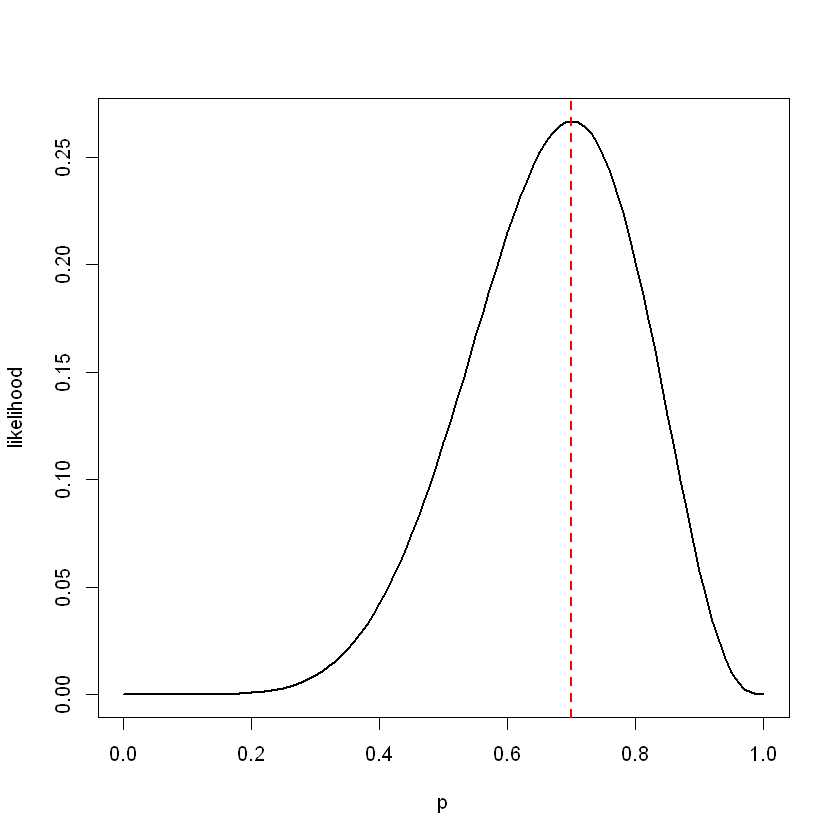

In [3]:
# WRITE DOWN THE LIKELIHOOD FUNCTION
binomial.likelihood<-function(p){
choose(10,7)*p^7*(1-p)^3
}
# LET US CALCULATE THE LIKELIHOOD VALUE AT p=0.1
binomial.likelihood(p=0.1)
# YOU GOT SOMETHING AROUND 8.748e-06, RIGHT?
# PLOT THE LIKELIHOOD FUNCTION FOR A RANGE OF p
p<-seq(0, 1, 0.01)
likelihood.values<-binomial.likelihood(p)
plot(p, likelihood.values, ylab='likelihood', type='l', lwd=2)
abline(v=0.7, col='red', lty=2, lwd=2)

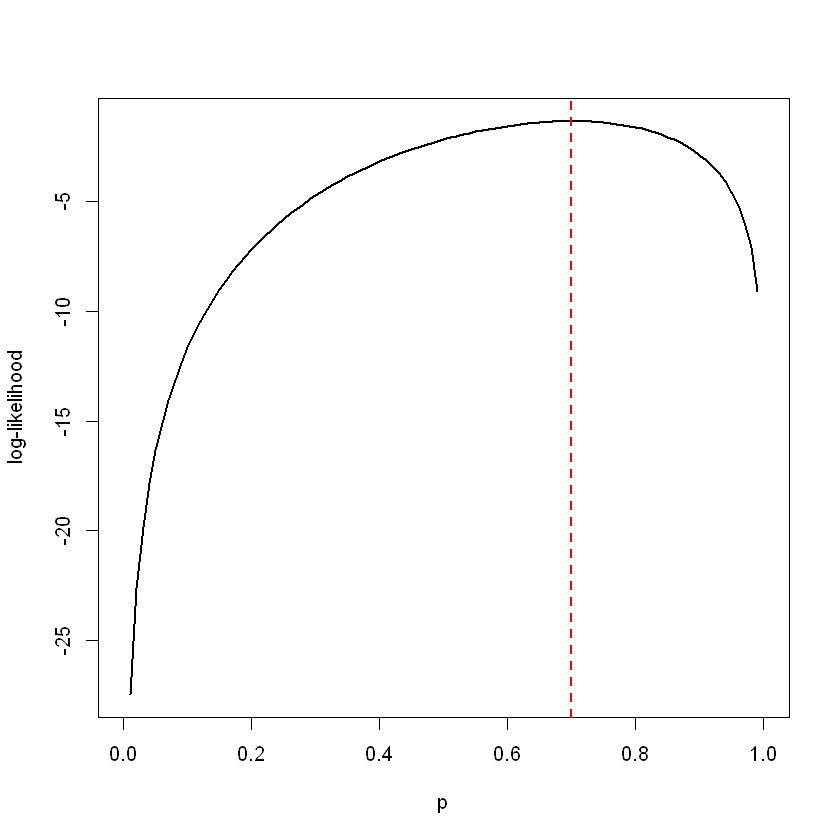

In [4]:
# LOG-LIKELIHOOD FUNCTION
log.binomial.likelihood<-function(p){
log(binomial.likelihood(p=p))
}
# PLOT THE LOG-LIKELIHOOD
p<-seq(0, 1, 0.01)
log.likelihood.values<-log.binomial.likelihood(p)
plot(p, log.likelihood.values, ylab='log-likelihood', type='l', lwd=2)
abline(v=0.7, col='red', lty=2, lwd=2)

The next step is to find value of $p$ such that $L(p)$ is maximised. It appears that the peak is at 0.7, and we say $\hat{p}=0.7$ is our maximum likelihood estimate. 

Beyond eyeballing, we can use R's optimisation routines to find the maixmum/minimum of a function. For univariate (one-parameter) case, we use <code>optimize()</code>:

In [5]:
optimize(binomial.likelihood, interval=c(0,1), maximum=TRUE)

$maximum
[1] 0.6999843

$objective
[1] 0.2668279

<code>\$maximum()</code> returns the parameter value at which the function attains its maximum, where the <code>\$objective</code> is the maximised function value. 

#### 4.4 Coin tossing example (by hand)
For a more general case with $y$ heads from $n$ independent tosses the likelihood function is:
$$L(p)=C_y^np^y(1-p)^{n-y}$$
To maximise a function means to find the first derivative, then find the point with zero slope. Of course there are other conditions need to be checked (e.g. the second derivative) for the global maximum. Here, let us work on the log-likelihood:
$$l(p)=\ln(L(p))=\ln(C_y^n)+y\ln(p)+(n-y)\ln(1-p)$$
Next, we differentiate $l(p)$ *with respect to $p$*. Note that the first term $\ln(C_y^n)$ does not contain $p$ thus is treated as a constant:
$$l'(p)=0+y\frac{1}{p}+(n-y)\frac{-1}{1-p}$$
Next, we find a $\hat{p}$ such that $l'(\hat{p})=0$:
$$\hat{p}=\frac{y}{n}$$
and we say this is the MLE for the (fixed but unknown) parameter $p$. 

#### 4.5 i.i.d. Normal samples with unknown $\mu$
Suppose we have $X_1, X_2, ..., X_n$ i.i.d. samples from $N(\mu, 1)$. Variance is known but $\mu$ is the parameter to be estimated. By definition, the likelihood is a function of $\mu$, and is the joint pdf of our samples:
$$L(\mu)=f(x_1, x_2, ..., x_n)$$
Here $f$ is a joint (higher-dimensional) pdf. As these samples are independent, the joint pdf becomes the product of individual pdfs:
$$L(\mu)=f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$
Note that $f_{X_i}$ are individual (one-dimensional) pdfs. Next, we make use of the fact that they are i.i.d. normal: 
$$L(\mu)=\prod_{i=1}^n\frac{1}{\sqrt{2\pi}}e^{\frac{(x_i-\mu)^2}{2}})$$
$$=(\frac{1}{\sqrt{2\pi}})^ne^{\frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2}$$
The log-likelihood function is:
$$l(\mu)=constant-\frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2$$
Next, differentiate it w.r.t. $\mu$:
$$l'(\mu)=0-\frac{1}{2}[-2\sum_{i=1}^n(x_i-\mu)]$$
Find a value of $\hat{\mu}$ such that $l'(\hat{\mu})=0$. That is to solve the following equation:
$$\sum_{i=1}^n(x_i-\hat{\mu})=0$$
Rearranging the terms gives:
$$\hat{\mu}=\frac{\sum_{i=1}^nx_i}{n}$$
And this is our MLE. 

#### 4.6 i.i.d. Normal samples unknown $\mu$ and $\sigma^2$
With unknown $\sigma^2$ the formulation of the log-likelihood function is the same as in the previous example but it is now a bivariate (two-paramter) function $l(\mu, \sigma^2)$. We need to evalulate the *partial* derivavtives along both directions: $\frac{\partial l}{\partial\mu}$ and $\frac{\partial l}{\partial\sigma^2}$. A partial derivative is a derivative of a multivariate function with respect to one of the variables while treating the rest as constants. At last, we need to find a pair of $(\hat{\mu}, \hat{\sigma^2})$ such that the two partial derivatives are zero simultaneously. Again pay attention to the parameter space: $\mu$ can be any real number, but $\sigma^2$ (or $\sigma$ itself) must be non-negative. I leave this to you as an exercise. 